<a href="https://colab.research.google.com/github/emiliapo/HealthyAgeing/blob/Working/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of images2556
Epoch 1/500
10/10 [==============================] - 3s 149ms/step - loss: 69.4768 - sex_out_loss: 0.7334 - age_out_loss: 68.4571 - sex_out_accuracy: 0.5221 - age_out_accuracy: 0.0000e+00 - val_loss: 10.8894 - val_sex_out_loss: 0.6972 - val_age_out_loss: 9.9398 - val_sex_out_accuracy: 0.5263 - val_age_out_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 10.88939, saving model to Age_sex_detection.h5
Epoch 2/500
10/10 [==============================] - 1s 58ms/step - loss: 28.5890 - sex_out_loss: 1.0495 - age_out_loss: 27.2943 - sex_out_accuracy: 0.5227 - age_out_accuracy: 0.0000e+00 - val_loss: 14.9850 - val_sex_out_loss: 0.6919 - val_age_out_loss: 14.0656 - val_sex_out_accuracy: 0.5472 - val_age_out_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 10.88939
Epoch 3/500
10/10 [==============================] - 1s 58ms/step - loss: 19.6212 - sex_out_loss: 0.7076 - age_out_loss: 18.6907 - sex_out_accuracy: 0.4969 - age_out_accuracy: 0.0

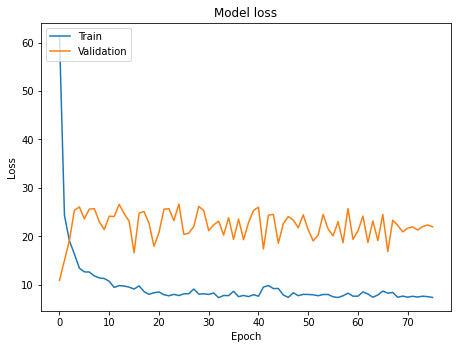

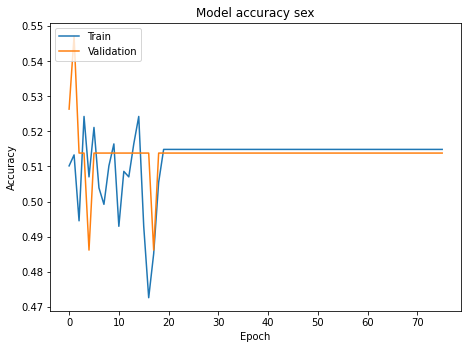

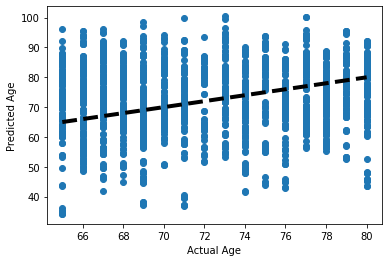

Report:
              precision    recall  f1-score   support

           0       0.75      0.04      0.07       932
           1       0.52      0.99      0.68       985

    accuracy                           0.53      1917
   macro avg       0.64      0.51      0.38      1917
weighted avg       0.63      0.53      0.39      1917

Results:


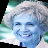

Index: 133
Actual age: 75
Predicted Age: 89
Actual sex: Female
Predicted Sex: Female


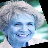

Index: 559
Actual age: 75
Predicted Age: 90
Actual sex: Female
Predicted Sex: Female


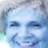

Index: 985
Actual age: 75
Predicted Age: 86
Actual sex: Female
Predicted Sex: Female


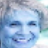

Index: 1411
Actual age: 75
Predicted Age: 87
Actual sex: Female
Predicted Sex: Female


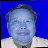

Index: 239
Actual age: 67
Predicted Age: 71
Actual sex: Male
Predicted Sex: Female


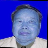

Index: 665
Actual age: 67
Predicted Age: 71
Actual sex: Male
Predicted Sex: Female


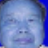

Index: 1091
Actual age: 67
Predicted Age: 69
Actual sex: Male
Predicted Sex: Female


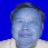

Index: 1517
Actual age: 67
Predicted Age: 68
Actual sex: Male
Predicted Sex: Female


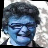

Index: 87
Actual age: 69
Predicted Age: 82
Actual sex: Female
Predicted Sex: Female


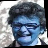

Index: 513
Actual age: 69
Predicted Age: 83
Actual sex: Female
Predicted Sex: Female


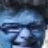

Index: 939
Actual age: 69
Predicted Age: 62
Actual sex: Female
Predicted Sex: Female


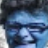

Index: 1365
Actual age: 69
Predicted Age: 63
Actual sex: Female
Predicted Sex: Female


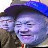

Index: 341
Actual age: 74
Predicted Age: 79
Actual sex: Male
Predicted Sex: Female


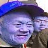

Index: 767
Actual age: 74
Predicted Age: 79
Actual sex: Male
Predicted Sex: Female


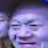

Index: 1193
Actual age: 74
Predicted Age: 74
Actual sex: Male
Predicted Sex: Female


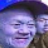

Index: 1619
Actual age: 74
Predicted Age: 73
Actual sex: Male
Predicted Sex: Female


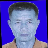

Index: 221
Actual age: 65
Predicted Age: 74
Actual sex: Male
Predicted Sex: Female


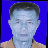

Index: 647
Actual age: 65
Predicted Age: 74
Actual sex: Male
Predicted Sex: Female


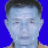

Index: 1073
Actual age: 65
Predicted Age: 73
Actual sex: Male
Predicted Sex: Female


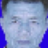

Index: 1499
Actual age: 65
Predicted Age: 76
Actual sex: Male
Predicted Sex: Female


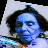

Index: 9
Actual age: 66
Predicted Age: 84
Actual sex: Female
Predicted Sex: Female


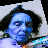

Index: 435
Actual age: 66
Predicted Age: 84
Actual sex: Female
Predicted Sex: Female


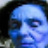

Index: 861
Actual age: 66
Predicted Age: 68
Actual sex: Female
Predicted Sex: Female


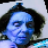

Index: 1287
Actual age: 66
Predicted Age: 77
Actual sex: Female
Predicted Sex: Female


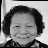

Index: 188
Actual age: 78
Predicted Age: 77
Actual sex: Female
Predicted Sex: Female


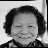

Index: 614
Actual age: 78
Predicted Age: 77
Actual sex: Female
Predicted Sex: Female


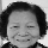

Index: 1040
Actual age: 78
Predicted Age: 67
Actual sex: Female
Predicted Sex: Female


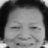

Index: 1466
Actual age: 78
Predicted Age: 62
Actual sex: Female
Predicted Sex: Female


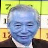

Index: 367
Actual age: 77
Predicted Age: 87
Actual sex: Male
Predicted Sex: Female


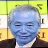

Index: 793
Actual age: 77
Predicted Age: 87
Actual sex: Male
Predicted Sex: Female


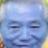

Index: 1219
Actual age: 77
Predicted Age: 78
Actual sex: Male
Predicted Sex: Female


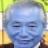

Index: 1645
Actual age: 77
Predicted Age: 79
Actual sex: Male
Predicted Sex: Female


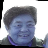

Index: 0
Actual age: 65
Predicted Age: 82
Actual sex: Female
Predicted Sex: Female


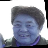

Index: 426
Actual age: 65
Predicted Age: 82
Actual sex: Female
Predicted Sex: Female


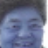

Index: 852
Actual age: 65
Predicted Age: 60
Actual sex: Female
Predicted Sex: Female


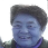

Index: 1278
Actual age: 65
Predicted Age: 78
Actual sex: Female
Predicted Sex: Female


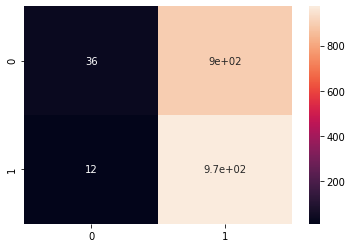

In [10]:
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import seaborn as sns
from google.colab.patches import cv2_imshow
from google.colab import drive
import random
import decimal

last = []
labels = []
images = []
ageList = []
sexList = []

class Image:

    def image_processing(self, folder):
      files = os.listdir(folder)
      for filename in files:
        img = cv2.imread(folder+'/'+filename)
        if img is not None:
          label = self.establishLabels(filename)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img, (48, 48))
          images.append(img)
          ageList.append(label[0])
          sexList.append(label[1])

          labels.append(label)
      nofOGFiles = len(images.copy())
      self.dataAugmentation()
      #self.showProcessedImage(564)

      # convert the labels and images to NumPy arrays

      images_f = np.array(images)
      sexList_f = np.array(sexList)
      ageList_f = np.array(ageList)
      labels_f = np.array(labels)

      np.save(folder + 'image.npy', images_f)
      np.save(folder + 'gender.npy', sexList_f)
      np.save(folder + 'age.npy', ageList_f)

      #self.showSexDistribution(sexList_f)
      #self.showAgeDistribution(ageList_f)

      # normalise the images array by dividing it with 255
      print("Number of images" +str(len(images_f)))
      images_f_2 = images_f / 255
      X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.75)
      #Y_train[0:5]

      Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
      Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]

      # Y_train_2[0][0:5]

      # Y_train_2[1][0:5]

      Model = self.model((48, 48, 3))
      # print(Model.summary())

      self.trainAndEvaluateModel(Model, X_train, X_test, Y_train, Y_test, Y_train_2, Y_test_2)

      self.testRandomImages(8, nofOGFiles, images_f, images_f_2, Model)


    def establishLabels(self, filename):
        name = filename.split(".")[0]
        splitName = name.split("A")
        s = int(splitName[-1])
        a = int(splitName[-2])
        #output = {'sex': s, 'age': a}
        output = [a, s]

        return output

    def dataAugmentation(self):
      ogimages = images.copy()
      oglabels = labels.copy()
      i = 0
      #flip originals
      for ogimage in ogimages:
        placeholder = cv2.flip(ogimage, 1)
        images.append(placeholder)
        newlabel = oglabels[i]
        labels.append(newlabel)
        i+=1
      # #scale
      imageCopy2 = images.copy()
      lableCopy2 = labels.copy()
      flippedScaledImages = []
      j = 0
      for ogimage in imageCopy2:
        if j == 0: s = 1.75
        else:
          s = float(decimal.Decimal(random.randrange(110, 175))/100) #random between 1.1 and 3.0
        scaled = cv2.resize(ogimage, None, fx= s, fy= s, interpolation= cv2.INTER_LINEAR)
        #crop back to 48 48
        cntr = int(scaled.shape[0] /2)

        crop_img = scaled[cntr - 24:cntr + 24, cntr - 24:cntr + 24].copy()
        newimg = cv2.resize(crop_img, (48,48))

        images.append(newimg)
        newlabel = lableCopy2[j].copy()
        labels.append(newlabel)

        #flip zoomed
        placeholder = cv2.flip(newimg, 1)
        flippedScaledImages.append(placeholder)
        
        j+=1

      #for the sake of consistency  
      k = 0
      for f in flippedScaledImages:
        images.append(f)
        newlabel = lableCopy2[k].copy()
        labels.append(newlabel)
        k+=1


      
    def showProcessedImage(self, index):

        cv2_imshow(images[index])
        print(labels[index])

        print("Press any key to exit...")
        cv2.waitKey(0) #waits for any key press

    def showSexDistribution(self, sexList_f):
        values, counts = np.unique(sexList_f, return_counts=True)
        #print(counts) #returns 207, 219

        plt.xlabel("Sex")
        plt.ylabel("Distribution")
        sex = ['Female', 'Male']
        plt.bar(sex, counts)
        plt.show()


    def showAgeDistribution(self, ageList_f):
        values, counts = np.unique(ageList_f, return_counts=True)
        #print(counts)

        plt.plot(values, counts)
        plt.xlabel('ages')
        plt.ylabel('distribution')
        plt.show()

    def testRandomImages(self, num, nOfOGFiles, images_f, images_f_2, Model):
      for i in range(num):
        max = int(nOfOGFiles - 1)
        index = random.randint(0, max)
        self.test_image(index, images_f, images_f_2, Model)
        self.test_image(index + 426, images_f, images_f_2, Model)
        self.test_image(index + 852, images_f, images_f_2, Model)
        self.test_image(index + 1278, images_f, images_f_2, Model)
      self.test_image(0, images_f, images_f_2, Model)
      self.test_image(426, images_f, images_f_2, Model)
      self.test_image(852, images_f, images_f_2, Model)
      self.test_image(1278, images_f, images_f_2, Model)

    def Convolution(self, input_tensor, filters):
        x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(
            input_tensor)
        x = Dropout(0.1)(x)
        x = Activation('relu')(x)
        return x


    def model(self, input_shape):
        inputs = Input((input_shape))

        conv_1 = self.Convolution(inputs, 32)
        maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
        conv_2 = self.Convolution(maxp_1, 64)
        maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
        conv_3 = self.Convolution(maxp_2, 128)
        maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
        conv_4 = self.Convolution(maxp_3, 256)
        maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
        flatten = Flatten()(maxp_4)
        dense_1 = Dense(64, activation='relu')(flatten)
        dense_2 = Dense(64, activation='relu')(flatten)
        drop_1 = Dropout(0.2)(dense_1)
        drop_2 = Dropout(0.2)(dense_2)
        output_1 = Dense(1, activation="sigmoid", name='sex_out')(drop_1)
        output_2 = Dense(1, activation="relu", name='age_out')(drop_2)

        model = Model(inputs=[inputs], outputs=[output_1, output_2])
        model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam",
                      metrics=["accuracy"])
        return model

    def trainAndEvaluateModel(self, Model, X_train, X_test, Y_train,
                              Y_test, Y_train_2, Y_test_2):
        fle_s='Age_sex_detection.h5'
        checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='auto',
                                       save_freq='epoch')
        Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
        callback_list=[checkpointer,Early_stop]

        History = Model.fit(X_train, Y_train_2,
                 validation_data=(X_test, Y_test_2),
                 epochs=500,
                 batch_size = 64,
                 callbacks=[callback_list])
        
        print("History: ")
        print(History.history)
        
        Model.evaluate(X_test, Y_test_2)
        pred=Model.predict(X_test)

        #print(pred[1])

        plt.plot(History.history['loss'])
        plt.plot(History.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                                wspace=0.35)
        plt.show()
        
        #For sex

        plt.plot(History.history['sex_out_accuracy'])
        plt.plot(History.history['val_sex_out_accuracy'])
        plt.title('Model accuracy sex')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                                wspace=0.35)
        plt.show()
        
        #for age

        fig, ax = plt.subplots()
        ax.scatter(Y_test_2[1], pred[1])
        ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
        ax.set_xlabel('Actual Age')
        ax.set_ylabel('Predicted Age')

        plt.show()

        #for sex
        j = 0
        Pred_l=[]
        while(j<len(pred[0])):
          Pred_l.append(int(np.round(pred[0][j])))
          j+=1

        print("Report:")
        report=classification_report(Y_test_2[0], Pred_l)
        print(report)

        print("Results:")
        results = confusion_matrix(Y_test_2[0], Pred_l)
        sns.heatmap(results, annot=True)

    def test_image(self, ind, images_f, images_f_2, Model):
      cv2_imshow(images_f[ind])
      image_test=images_f_2[ind]
      pred_1=Model.predict(np.array([image_test]))
      sex_f=['Male','Female']
      age=int(np.round(pred_1[1][0]))
      sex=int(np.round(pred_1[0][0]))
      actualsex = ""

      if labels[ind][1] == 0:
        actualsex = "Female"
      if labels[ind][1] == 1:
        actualsex = "Male"
      print("Index: "+ str(ind))
      print("Actual age: " + str(labels[ind][0]))
      print("Predicted Age: "+ str(age))
      print("Actual sex: " + actualsex)
      print("Predicted Sex: "+ sex_f[sex])
        
folder = "/content/drive/MyDrive/HealthyAgeing/Data/Eastern_Elder_Faces"
Image().image_processing(folder)

Number of images852
Epoch 1/500
10/10 [==============================] - 34s 94ms/step - loss: 66.4520 - sex_out_loss: 0.8217 - age_out_loss: 65.3401 - sex_out_accuracy: 0.5262 - age_out_accuracy: 0.0000e+00 - val_loss: 17.4006 - val_sex_out_loss: 0.7741 - val_age_out_loss: 16.3661 - val_sex_out_accuracy: 0.5664 - val_age_out_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 17.40061, saving model to Age_sex_detection.h5
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 18.4842 - sex_out_loss: 1.1251 - age_out_loss: 17.1058 - sex_out_accuracy: 0.5115 - age_out_accuracy: 0.0000e+00 - val_loss: 27.8255 - val_sex_out_loss: 0.7360 - val_age_out_loss: 26.8549 - val_sex_out_accuracy: 0.4336 - val_age_out_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 17.40061
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 15.4628 - sex_out_loss: 0.7638 - age_out_loss: 14.4690 - sex_out_accuracy: 0.4775 - age_out_accuracy: 0.0

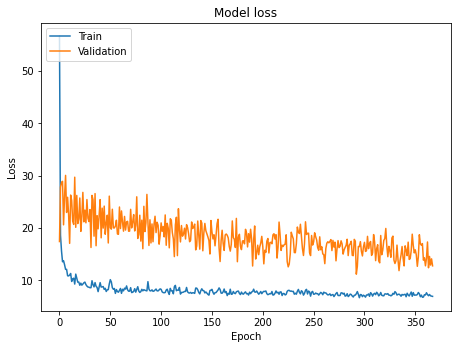

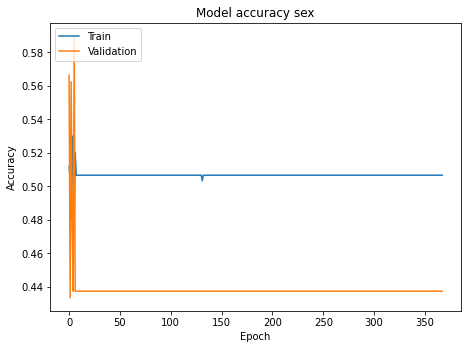

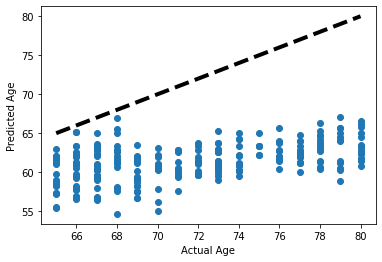

Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       112
           1       0.00      0.00      0.00       144

    accuracy                           0.44       256
   macro avg       0.22      0.50      0.30       256
weighted avg       0.19      0.44      0.27       256

Results:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


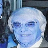

Index: 424
Actual age: 80
Predicted Age: 64
Actual sex: Male
Predicted Sex: Male


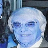

Index: 424
Actual age: 80
Predicted Age: 64
Actual sex: Male
Predicted Sex: Male


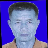

Index: 647
Actual age: 65
Predicted Age: 57
Actual sex: Male
Predicted Sex: Male


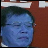

Index: 243
Actual age: 67
Predicted Age: 56
Actual sex: Male
Predicted Sex: Male


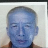

Index: 846
Actual age: 78
Predicted Age: 61
Actual sex: Male
Predicted Sex: Male


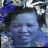

Index: 34
Actual age: 67
Predicted Age: 56
Actual sex: Female
Predicted Sex: Male


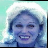

Index: 442
Actual age: 66
Predicted Age: 61
Actual sex: Female
Predicted Sex: Male


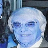

Index: 424
Actual age: 80
Predicted Age: 64
Actual sex: Male
Predicted Sex: Male


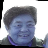

Index: 0
Actual age: 65
Predicted Age: 56
Actual sex: Female
Predicted Sex: Male


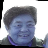

Index: 426
Actual age: 65
Predicted Age: 56
Actual sex: Female
Predicted Sex: Male


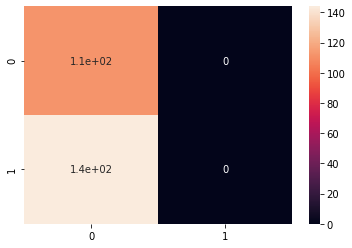